In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Data
Y = np.array([500, 600, 550, 800, 750, 400, 900, 650])   # Harga rumah
X1 = np.array([120, 150, 130, 200, 180, 100, 220, 160])  # Luas (m2)
X2 = np.array([3, 4, 3, 5, 4, 2, 5, 3])                  # Jumlah kamar

# Buat DataFrame
df = pd.DataFrame({
    'Harga': Y,
    'Luas_m2': X1,
    'Kamar': X2
})

print(df)

   Harga  Luas_m2  Kamar
0    500      120      3
1    600      150      4
2    550      130      3
3    800      200      5
4    750      180      4
5    400      100      2
6    900      220      5
7    650      160      3


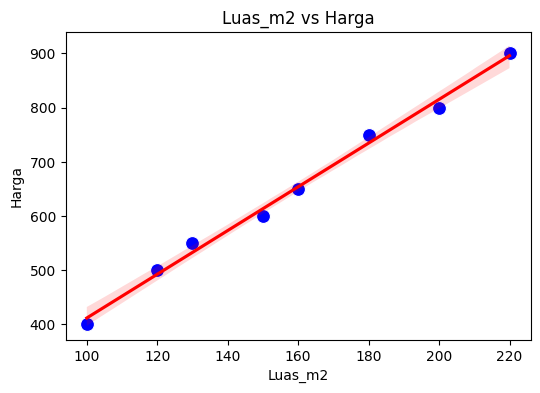

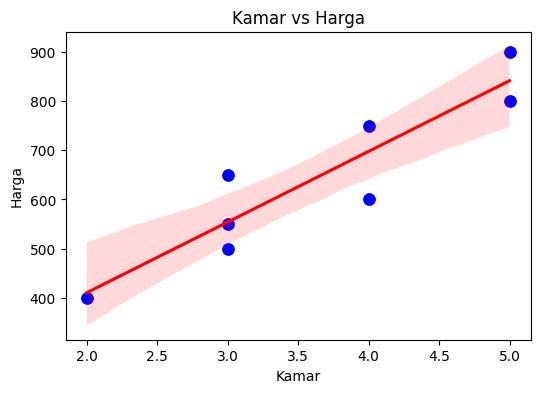

In [ ]:
# ==========================
# Plot Semua Fitur vs Harga
# ==========================
features = [
    "Luas_m2",
    "Kamar",
]

for col in features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=col, y="Harga", data=df, s=100, color="blue")
    sns.regplot(x=col, y="Harga", data=df, scatter=False, color="red")
    plt.title(f"{col} vs Harga")
    plt.xlabel(col)
    plt.ylabel("Harga")
    plt.show()

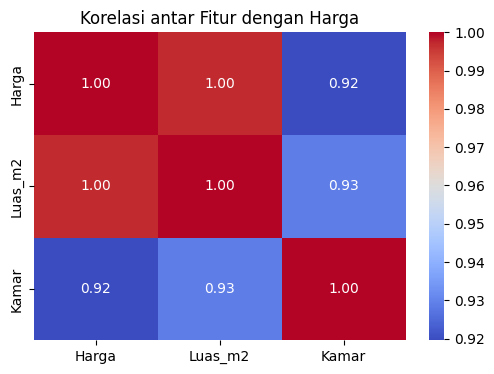

Korelasi fitur dengan harga:
Harga      1.000000
Luas_m2    0.996937
Kamar      0.919540
Name: Harga, dtype: float64


In [ ]:
# ==========================
# 2. Korelasi
# ==========================
corr = df.corr(numeric_only=True)
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi antar Fitur dengan Harga")
plt.show()

# Cetak korelasi harga dengan fitur
print("Korelasi fitur dengan harga:")
print(corr["Harga"].sort_values(ascending=False))

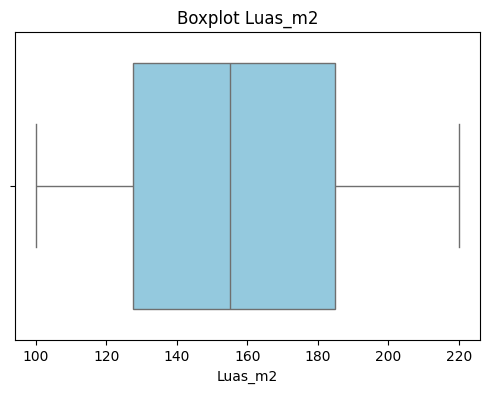


Outlier terdeteksi pada kolom Luas_m2:
Tidak ada outlier


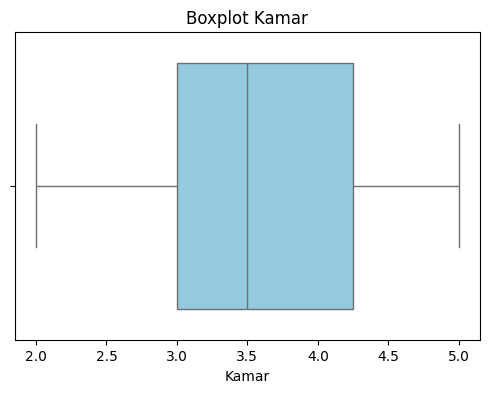


Outlier terdeteksi pada kolom Kamar:
Tidak ada outlier


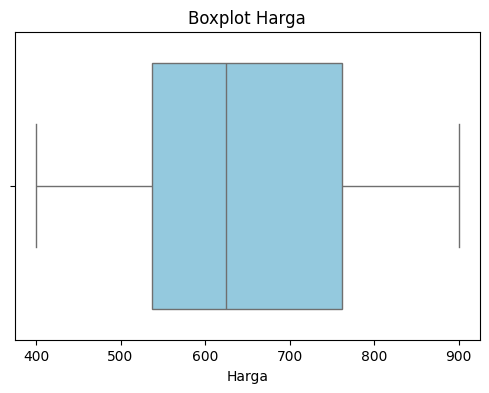


Outlier terdeteksi pada kolom Harga:
Tidak ada outlier


In [ ]:
# ==========================
# Outlier Detection untuk semua fitur
# ==========================

features = [
    "Luas_m2",
    "Kamar",
    "Harga"   # bisa juga dicek langsung untuk target
]

for col in features:
    # Boxplot
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot {col}")
    plt.show()

    # IQR Method
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"\nOutlier terdeteksi pada kolom {col}:")
    print(outliers[[col]] if not outliers.empty else "Tidak ada outlier")

In [ ]:
from sklearn.linear_model import LinearRegression

# Fitur & Target
X = df.drop(columns=["Harga"])
y = df["Harga"]

# Model Linear Regression
model = LinearRegression()
model.fit(X, y)

# Prediksi harga
df["Predicted Harga"] = model.predict(X).round(2)

# Hitung selisih (Residual)
df["Residual"] = (df["Harga"] - df["Predicted Harga"]).round(2)

# Threshold: rumah dianggap outlier jika selisih > 15% dari harga aktual
threshold = 0.15
df["Outlier_Flag"] = abs(df["Residual"]) > (threshold * df["Harga"])

# Cetak hasil
print("\nHasil Prediksi Harga Rumah:")
print(df[[
    "Luas_m2",
    "Kamar",
    "Harga",
    "Predicted Harga",
    "Residual",
    "Outlier_Flag"
]])

# Tampilkan rumah yang lebih murah/mahal
print("\nRumah yang jauh lebih murah/mahal dari perkiraan:")
outliers = df[df["Outlier_Flag"] == True]
print(outliers if not outliers.empty else "Tidak ada rumah yang menyimpang signifikan.")


Hasil Prediksi Harga Rumah:
   Luas_m2  Kamar  Harga  Predicted Harga  Residual  Outlier_Flag
0      120      3    500           490.57      9.43         False
1      150      4    600           609.53     -9.53         False
2      130      3    550           532.61     17.39         False
3      200      5    800           812.57    -12.57         False
4      180      4    750           735.66     14.34         False
5      100      2    400           413.65    -13.65         False
6      220      5    900           896.66      3.34         False
7      160      3    650           658.74     -8.74         False

Rumah yang jauh lebih murah/mahal dari perkiraan:
Tidak ada rumah yang menyimpang signifikan.


In [ ]:
from sklearn.linear_model import LinearRegression

# Fitur & Target
X = df.drop(columns=["Harga", "Predicted Harga", "Residual", "Outlier_Flag"]) # No column to drop based on previous code
y = df["Harga"]

# Model Linear Regression
model = LinearRegression()
model.fit(X, y)

# Prediksi harga
df["Predicted Harga"] = model.predict(X).round(2)

# Hitung selisih (Residual)
df["Residual"] = (df["Harga"] - df["Predicted Harga"]).round(2)

# Threshold: rumah dianggap outlier jika selisih > 15% dari harga aktual
threshold = 0.15
df["Outlier_Flag"] = abs(df["Residual"]) > (threshold * df["Harga"])

# Cetak hasil
print("\nHasil Prediksi Harga Rumah:")
print(df[[
    "Luas_m2",
    "Kamar",
    "Harga",
    "Predicted Harga",
    "Residual",
    "Outlier_Flag"
]])

# Tampilkan rumah yang lebih murah/mahal
print("\nRumah yang jauh lebih murah/mahal dari perkiraan:")
outliers = df[df["Outlier_Flag"] == True]
print(outliers if not outliers.empty else "Tidak ada rumah yang menyimpang signifikan.")


Hasil Prediksi Harga Rumah:
   Luas_m2  Kamar  Harga  Predicted Harga  Residual  Outlier_Flag
0      120      3    500           490.57      9.43         False
1      150      4    600           609.53     -9.53         False
2      130      3    550           532.61     17.39         False
3      200      5    800           812.57    -12.57         False
4      180      4    750           735.66     14.34         False
5      100      2    400           413.65    -13.65         False
6      220      5    900           896.66      3.34         False
7      160      3    650           658.74     -8.74         False

Rumah yang jauh lebih murah/mahal dari perkiraan:
Tidak ada rumah yang menyimpang signifikan.


In [ ]:

print("Masukkan detail rumah untuk diprediksi harganya:")

size = float(input("Ukuran rumah (m2): "))
bedrooms = int(input("Jumlah kamar: "))


# Buat dataframe untuk input
user_input = pd.DataFrame({
    "Luas_m2": [size],
    "Kamar": [bedrooms],
})

# Prediksi harga
predicted_price = model.predict(user_input)[0]

print(f"\nPerkiraan harga rumah: ${predicted_price:.2f}")

Masukkan detail rumah untuk diprediksi harganya:
Ukuran rumah (m2): 170
Jumlah kamar: 4

Perkiraan harga rumah: $693.61
